In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,log_loss

In [2]:
def initialisation(n0,n1,n2):
    w1=np.random.randn(n1,n0)
    b1=np.random.randn(n1,1)
    w2=np.random.randn(n2,n0)
    b2=np.random.randn(n2,1)
    parametres={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return parametres

In [3]:
def forword_propagation(X,parametres):
    w1=parametres['w1']
    b1=parametres['b1']
    w2=parametres['w2']
    b2=parametres['b2']
    z1=w1.dot(X)+b1
    A1=1/(1+np.exp(-z1))
    z2=w2.dot(X)+b2
    A2=1/(1+np.exp(z2))
    activation={'A1':A1,'A2':A2}
    return activation


In [4]:
def back_propagation(X,y,activation,parametres):
    A1=activation['A1']
    A2=activation['A2']
    w2=parametres['w2']
    m=y.shape[1]
    dz2=A2-y
    dw2=1/(m*dz2.dot(A1.T))
    db2=1/m*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=np.dot(w2.T,dz2)*A2*(1-A1)
    dw1=1/m*dz1.dot(X.T)
    db1=1/m*np.sum(dz1,axis=1,keepdims=True)
    gradients={'dw1':dw1,'db1':db1,'dw2':dw2,'db2':db2}
    return gradients


In [5]:
def update(gradients,parametres,learning_rate):
    w1=parametres['w1']
    b1=parametres['b1']
    w2=parametres['w2']
    b2=parametres['b2']
    
    dw1=gradients['dw1']
    db1=gradients['db1']
    dw2=gradients['dw2']
    db2=gradients['db2']
    
    w1=w1-learning_rate*dw1
    b1=b1-learning_rate*db1
    w2=w2-learning_rate*dw2
    b2=b2-learning_rate*db2
    
    parametres={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
    return parametres


In [6]:
def prediction(X,parametres):
    activation=forword_propagation(X,parametres)
    A2=activation['A2']
    return A2>=0.5

In [7]:
def neural_network(X_train,y_train,n1, learning_rate=0.001,n_iter=1000):
    # initialisation
    n0=X_train.shape[0]
    n2=y_train.shape[0]
    parametres=initialisation(n0,n1,n2)
    
    train_loss=[]
    train_acc=[]
    for i in range(n_iter):
        activations=forword_propagation(X_train,parametres)
        gradients=back_propagation(X_train,y_train,activations,parametres)
        parametres=update(gradients,parametres,learning_rate)
        if i%10==0:
            train_loss.append(log_loss(y_train,activations['A2']))
            y_pred=prediction(X_train,parametres)
            curent_accuracy=accuracy_score(y_train.flatten(),y_pred.flatten())
            train_acc.append(curent_accuracy)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(train_loss,label='train_loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc,label='train_acc')
    plt.legend()
    plt.show()
    return parametres

la dimension de X (2, 100)
la dimension de y (1, 100)


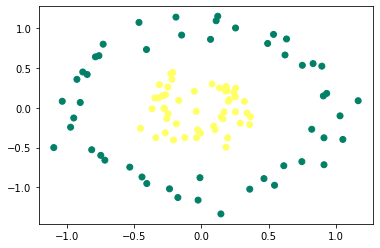

In [8]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100,noise=0.1,factor=0.3,random_state=0)
x=X.T
Y=y.reshape((1,y.shape[0]))
print('la dimension de X',x.shape)
print('la dimension de y',Y.shape)
plt.scatter(x[0,:],x[1,:],c=y,cmap='summer')

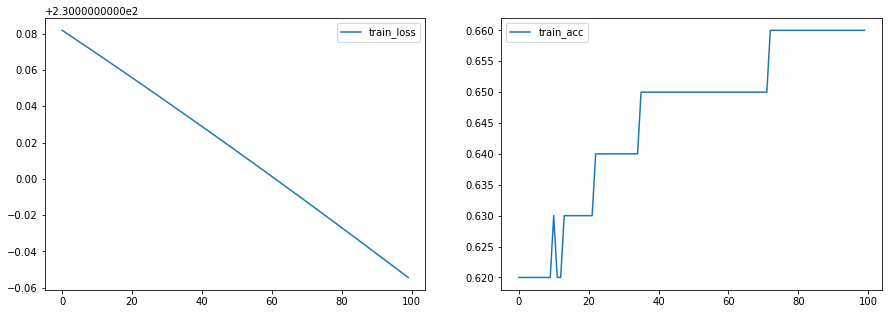

In [9]:
parametres=neural_network(x,Y,n1=2, learning_rate=0.001,n_iter=1000)

In [10]:
parametres

{'w1': array([[-0.8383717 ,  0.33933994],
        [-0.61683438, -1.61698642]]),
 'b1': array([[-0.98092995],
        [-1.10304924]]),
 'w2': array([[ 0.5332095 , -1.12449786]]),
 'b2': array([[-0.42866679]])}